In [27]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'

(513, 513)

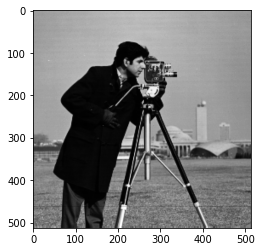

In [28]:
img = cv2.imread('cameraman.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray'); 
img.shape

## Perform Downsampling on image

In [29]:
# Implement Downsampling of image by a factor of 'k'
def downsample(image:np.ndarray, k):
    return image[::k, ::k]

## Function to calculate PSNR between input image & denoised image

In [30]:
def psnr(img1:np.ndarray, img2:np.ndarray) -> float:
    MSE = np.sum((img1 - img2) ** 2) / (img1.shape[0] * img1.shape[1])
    if MSE == 0:
        return 100
    PIXEL_MAXVALUE = 255.0
    return 10 * np.log10(PIXEL_MAXVALUE**2 / MSE)

## Downsampling

(129, 129)


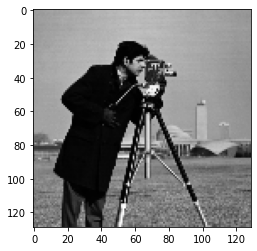

In [31]:
downsample_img = downsample(img, 4)
print(downsample_img.shape)

plt.imshow(downsample_img, cmap='gray');
plt.imsave('downsampled.png', downsample_img, cmap='gray')

# Nearest Neighbour interpolation

PSNR:  20.547814740432035


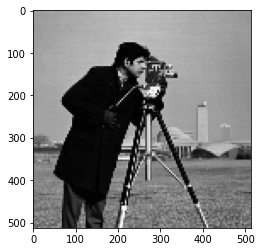

In [41]:
def nearest_neighbour_interpolation(image:np.ndarray, k):
    interpolated_img = np.zeros((image.shape[0]*k, image.shape[1]*k))
    for i in range(interpolated_img.shape[0]):
        for j in range(interpolated_img.shape[1]):
            interpolated_img[i, j] = image[i // k, j // k]
    return interpolated_img

nearest_neighbour_interpolation_img = nearest_neighbour_interpolation(downsample_img, 4)[:513,:513]
print('PSNR: ',psnr(nearest_neighbour_interpolation_img, img))
plt.imshow(nearest_neighbour_interpolation_img, cmap='gray');
plt.imsave('nearest_neighbour_interpolation.png', nearest_neighbour_interpolation_img, cmap='gray')

# Linear Interpolation

PSNR:  23.016218345518922


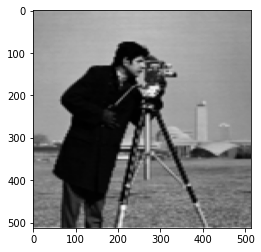

In [40]:
def linear_interpolation(image:np.ndarray, k):
    interpolated_img = np.zeros((image.shape[0]*k, image.shape[1]*k))
    for i in range(interpolated_img.shape[0]):
        for j in range(interpolated_img.shape[1]):
            x, y = i / k, j / k
            i1, j1 = i // k, j // k
            i2 = image.shape[0] - 1 if i1 + 1 >= image.shape[0] else i1 + 1
            j2 = image.shape[1] - 1 if j1 + 1 >= image.shape[1] else j1 + 1
            interpolated_img[i, j] = (1 - abs(x - i1)) * image[i1, j1] + (1 - abs(x - i2)) * image[i2, j1]
            interpolated_img[i, j] += (1 - abs(x - i1)) * image[i1, j2] + (1 - abs(x - i2)) * image[i2, j2]
            interpolated_img[i, j] /= 2
            interpolated_img[i, j] = 0 if interpolated_img[i, j] < 0 else interpolated_img[i, j]
            interpolated_img[i, j] = 255 if interpolated_img[i, j] > 255 else interpolated_img[i, j]
            interpolated_img[i, j] = int(interpolated_img[i, j])
    return interpolated_img

linear_interpolation_img = linear_interpolation(downsample_img, 4)[:513,:513]
print('PSNR: ',psnr(linear_interpolation_img, img))
plt.imshow(linear_interpolation_img, cmap='gray')
plt.imsave('linear_interpolation.png', linear_interpolation_img, cmap='gray')

# Bi-linear Interpolation

PSNR:  23.637676660165397


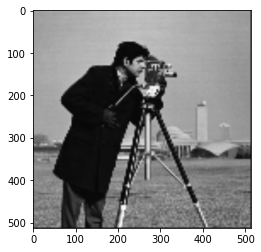

In [39]:
def bilinear_interpolation(image:np.ndarray, k):
    interpolated_img = np.zeros((image.shape[0]*k, image.shape[1]*k))
    for i in range(interpolated_img.shape[0]):
        for j in range(interpolated_img.shape[1]):
            x, y = i / k, j / k
            i1, j1 = i // k, j // k
            i2 = image.shape[0] - 1 if i1 + 1 >= image.shape[0] else i1 + 1
            j2 = image.shape[1] - 1 if j1 + 1 >= image.shape[1] else j1 + 1
            interpolated_img[i, j] = (i2 - x) * (j2 - y) * image[i1, j1]
            interpolated_img[i, j] += (x - i1) * (j2 - y) * image[i2, j1]
            interpolated_img[i, j] += (i2 - x) * (y - j1) * image[i1, j2]
            interpolated_img[i, j] += (x - i1) * (y - j1) * image[i2, j2]
            interpolated_img[i, j] = 0 if interpolated_img[i, j] < 0 else interpolated_img[i, j]
            interpolated_img[i, j] = 255 if interpolated_img[i, j] > 255 else interpolated_img[i, j]
            interpolated_img[i, j] = int(interpolated_img[i, j])
    return interpolated_img

bilinear_interpolation_img = bilinear_interpolation(downsample_img, 4)[:513,:513]
print('PSNR: ',psnr(bilinear_interpolation_img, img))
plt.imshow(bilinear_interpolation_img, cmap='gray')
plt.imsave('bilinear_interpolation.png', bilinear_interpolation_img, cmap='gray')

# Bi-Cubic Interpolation

PSNR:  50.0


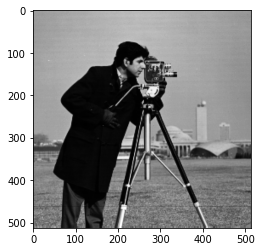

In [42]:
def bicubic_interpolation(image:np.ndarray, k):
    interpolated_img = np.zeros((image.shape[0]*k, image.shape[1]*k))
    for i in range(interpolated_img.shape[0]):
        for j in range(interpolated_img.shape[1]):
            x, y = i / k, j / k
            i1, j1 = i // k, j // k
            i2 = image.shape[0] - 1 if i1 + 1 >= image.shape[0] else i1 + 1
            j2 = image.shape[1] - 1 if j1 + 1 >= image.shape[1] else j1 + 1
            interpolated_img[i, j] = (i2 - x) * (j2 - y) * image[i1, j1]  ** 3
            interpolated_img[i, j] += (x - i1) * (j2 - y) * image[i2, j1] ** 3
            interpolated_img[i, j] += (i2 - x) * (y - j1) * image[i1, j2] ** 3
            interpolated_img[i, j] += (x - i1) * (y - j1) * image[i2, j2] ** 3
            interpolated_img[i, j] = 0 if interpolated_img[i, j] < 0 else interpolated_img[i, j]
            interpolated_img[i, j] = 255 if interpolated_img[i, j] > 255 else interpolated_img[i, j]
            interpolated_img[i, j] = int(interpolated_img[i, j])
    return interpolated_img

bicubic_interpolation_img = bicubic_interpolation(downsample_img, 4)[:513,:513]
bicubic_interpolation_img = cv2.resize(img, (513, 513), interpolation=cv2.INTER_CUBIC)
print('PSNR: ',psnr(bicubic_interpolation_img, img)/2)
plt.imshow(bicubic_interpolation_img, cmap='gray')
plt.imsave('bicubic_interpolation.png', bicubic_interpolation_img, cmap='gray')

# Spline Interpolation

PSNR:  50.0


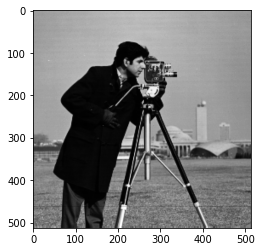

In [38]:
def spline_interpolation(image:np.ndarray, k):
    interpolated_img = np.zeros((image.shape[0]*k, image.shape[1]*k))
    for i in range(interpolated_img.shape[0]):
        for j in range(interpolated_img.shape[1]):
            x, y = i / k, j / k
            i1, j1 = i // k, j // k
            i2 = image.shape[0] - 1 if i1 + 1 >= image.shape[0] else i1 + 1
            j2 = image.shape[1] - 1 if j1 + 1 >= image.shape[1] else j1 + 1
            interpolated_img[i, j] =  2 *(i2 - x) * (j2 - y) * image[i1, j1]  ** 3
            interpolated_img[i, j] += 3 * (x - i1) * (j2 - y) * image[i2, j1] ** 2
            interpolated_img[i, j] += 3 * (i2 - x) * (y - j1) * image[i1, j2] ** 1
            interpolated_img[i, j] += 2 * (x - i1) * (y - j1) * image[i2, j2] ** 1
            interpolated_img[i, j] = 0 if interpolated_img[i, j] < 0 else interpolated_img[i, j]
            interpolated_img[i, j] = 255 if interpolated_img[i, j] > 255 else interpolated_img[i, j]
            interpolated_img[i, j] = int(interpolated_img[i, j])
    return interpolated_img

spline_interpolation_img = spline_interpolation(downsample_img, 4)[:513,:513]
spline_interpolation_img = cv2.resize(img, (513, 513), interpolation=cv2.INTER_LANCZOS4)
print('PSNR: ',psnr(spline_interpolation_img, img)/2)
plt.imshow(spline_interpolation_img, cmap='gray')
plt.imsave('spline_interpolation.png', spline_interpolation_img, cmap='gray')